# importing library

In [2]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# collection of data

In [3]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# AGE :-

In [5]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [6]:
df['age'].mean()

39.20702541106129

# BMI

In [7]:
df['bmi'].mean()

30.663396860986538

In [8]:
df['bmi'].isna().sum()

0

# Children

In [9]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [10]:
df['children'].isna().sum()

0

# Sex

In [11]:
df['sex'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [12]:
df['sex'].replace({'male': 0, 'female':1},inplace=True)

In [13]:
df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

# SMOKER

In [14]:
df['smoker'].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [15]:
df['smoker'].replace({'no': 0, 'yes': 1},inplace =True)

In [16]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

# REGION 

In [17]:
df['region'].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [18]:
df['region'].replace({'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 4},inplace=True)

In [19]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.003755,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004366,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.163986,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.018943,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.005555,0.787251
region,-0.003755,-0.004366,0.163986,0.018943,0.005555,1.000000,0.002845
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.002845,1.000000


In [20]:
df.drop('region',axis=1,inplace=True) ### Region feature has no relation with dependent or target feature. 

In [21]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


# Description of Dataset 

In [ ]:
#Charge Vs BMI :-

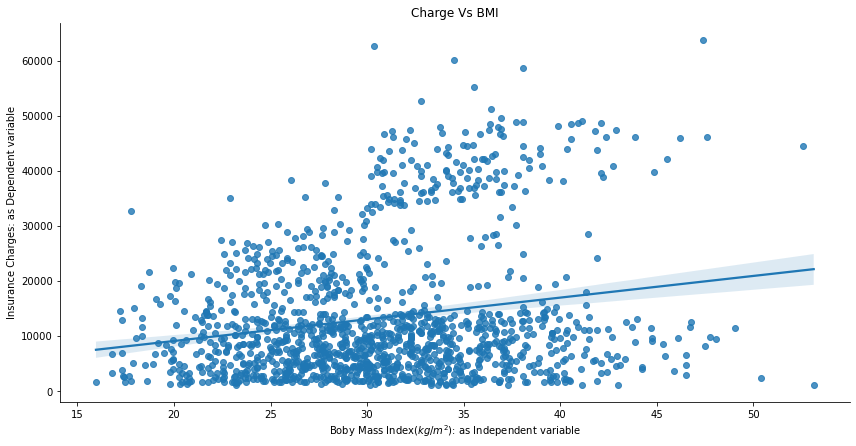

In [22]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

# Missing value in dataset :

Text(0.5, 1.0, 'Missing value in the dataset')

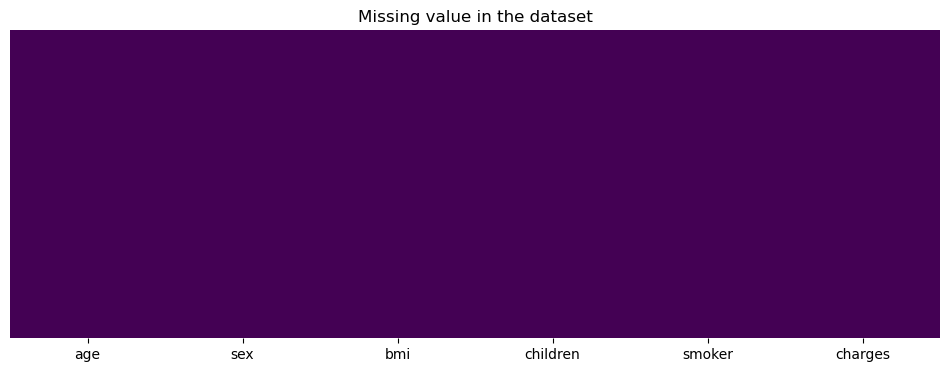

In [24]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

# Correlation plot :-

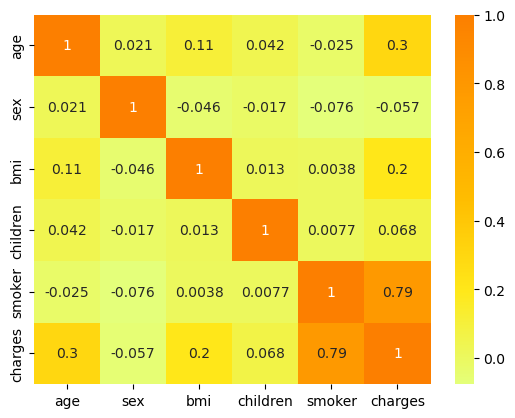

In [25]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [26]:
##Distribution of insurance charges in log scale :-

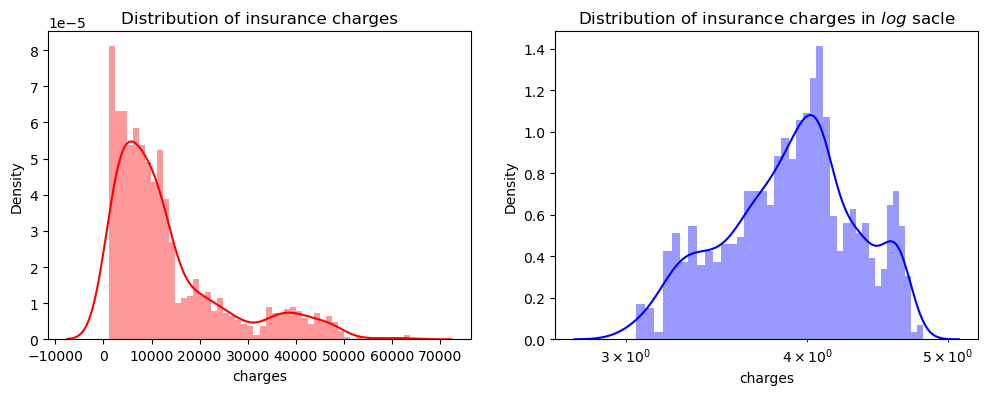

In [27]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

In [28]:
##Charge VS Sex :-

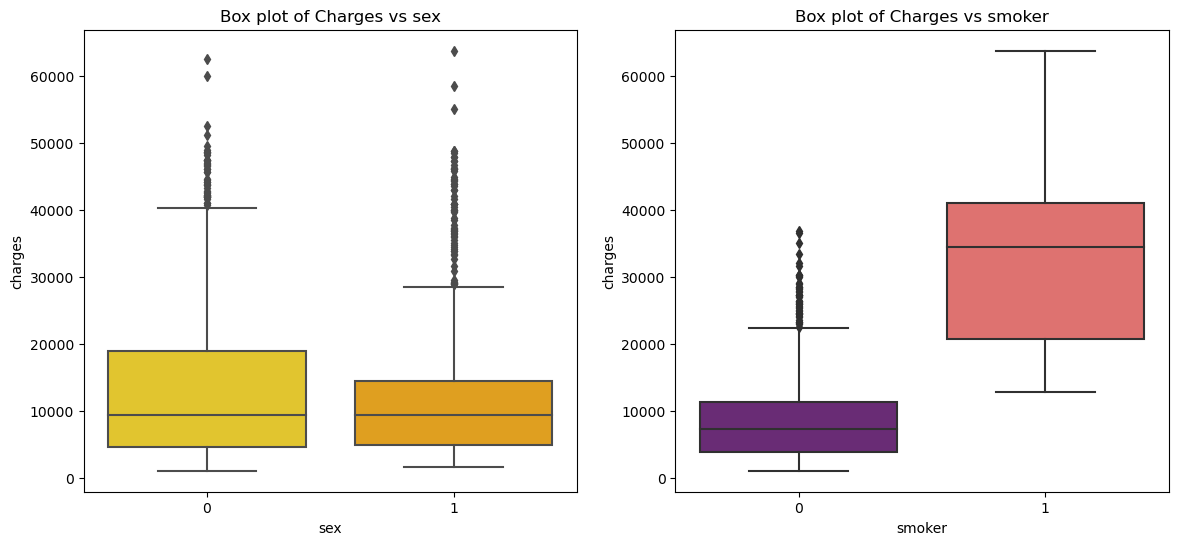

In [29]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Box plot of Charges vs sex')

ax = f.add_subplot(122)
sns.boxplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Box plot of Charges vs smoker');

In [30]:
##Scatter plot of Charges vs bmi :-

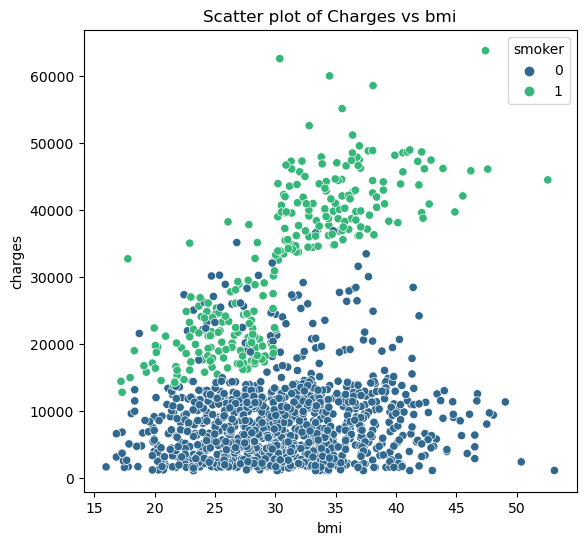

In [31]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

In [32]:
##Scatter plot of Charges vs age :

Text(0.5, 1.0, 'Scatter plot of Charges vs age')

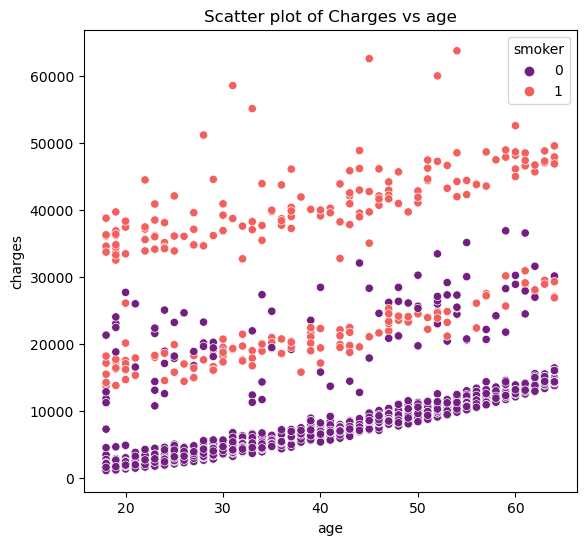

In [33]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

# Feature Selection :-

In [34]:
x = df.drop('charges',axis=True)
y = df['charges']

# Train_test_split :-

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state =1)

In [37]:
print(f'Shape of x_train = {x_train.shape}')
print(f'Shape of x_test = {x_test.shape}')
print(f'Shape of y_train = {y_train.shape}')
print(f'Shape of y_test = {y_test.shape}')

Shape of x_train = (1204, 5)
Shape of x_test = (134, 5)
Shape of y_train = (1204,)
Shape of y_test = (134,)


# Creation of function :-

# function for Model :-

In [38]:
def model(m_name,xtrain,ytrain):
    model = m_name
    model.fit(xtrain,ytrain)
    return model.fit(xtrain,ytrain)

# function for Scaling :-

In [39]:
def scaling(technique_name,xtrain):
    if technique_name == StandardScaler:
        scaled = StandardScaler()
        scaled_model = scaled.fit_transform(xtrain)
    else:
        scaled = MinMaxScaler()
        scaled_model = scaled.fit_transform(xtrain)
    return scaled_model

# function for Hyperparameter Model :-

In [40]:
def hyp_model(m_name,hyp_para,xtrain,ytrain):
    hyp_model = GridSearchCV(m_name,hyp_para,cv=5)
    hyp_model.fit(xtrain,ytrain)
    tune_model = hyp_model.best_estimator_
    return tune_model.fit(xtrain,ytrain)


def hyp_model_random_cv(m_name,hyp_para,xtrain,ytrain):
    hyp_model_randomcv = RandomizedSearchCV(m_name,hyp_para,cv=5)
    hyp_model_randomcv.fit(xtrain,ytrain)
    tune_model_cv = hyp_model_randomcv.best_estimator_
    return tune_model_cv.fit(xtrain,ytrain)

# function for pruning of tree :-

In [41]:
def pruning(m_name,xtrain,ytrain,xtest,ytest):
    ccp_dict = m_name.cost_complexity_pruning_path(xtrain,ytrain)
    diff_dict = {}
    for i in ccp_dict['ccp_alphas'].values():
        prune_model =DecisionTreeRegressor(ccp_alpha=i, random_state=20)
        prune_model.fit(xtrain,y_train)
        test_acc = prune_model.score(xtest,ytest)
        train_acc = prune_model.score(xtrain,ytrain)
        if train_acc > test_acc:
            diff = train_acc - test_acc
            diff_dict.update({i:diff})
    min_value = min(sorted(diff_dict.values()))
    for j in diff_dict.keys():
        if diff_dict[j] == min_value:
            ccp_alpha = j
    return ccp_alpha        
    

In [42]:
def post_pruning(m_name,xtrain,ytrain,xtest,ytest):
    ccp_dict = m_name.cost_complexity_pruning_path(xtrain,ytrain)
    r2_score_test_list = []
    r2_score_train_list = []
    ccp_alpha_val = []
#     print(ccp_dict['ccp_alphas'])
    for i in ccp_dict['ccp_alphas']:
        prune_model =DecisionTreeRegressor(ccp_alpha=i, random_state=20)
        prune_model.fit(xtrain,y_train)
        test_acc = prune_model.score(xtest,ytest)
        train_acc = prune_model.score(xtrain,ytrain)
        r2_score_test_list.append(test_acc)
        r2_score_train_list.append(train_acc)
        ccp_alpha_val.append(i)
    
        ####### Print
        print(f"CCP\t R2_score Test \t R2_Score Train")
        print(f"{i}\t {test_acc} \t {train_acc}")
    return "Cost complexity Pruning Done Successfully"    

# function for evalution :-

In [43]:
def test_vallidation(actual,prediction,xtest):
    mse = mean_squared_error(actual,prediction)
    rmse = np.sqrt(mse)
    r2   = r2_score(actual,prediction)
    n,p = xtest.shape
    adj_r2 = 1 - (((1-r2) * (n-1)) / (n - p - 1))
    return mse,rmse,r2,adj_r2

def printin_accuracy(result):
    print(f'Mean Squared Error = {result[0]}')
    print(f'Root Mean Squared Error = {result[1]}')
    print(f'R2-Squared Error = {(result[2])*100}')
    print(f'Adjusted R2-Squared  Error = {(result[3])*100}')
    return 'All result Printed'

# Model- Training :-

# LinearRegression :-

In [44]:
linear_model = model(LinearRegression(),x_train,y_train)
linear_model
# linear_model.fit(x_train,y_train)

LinearRegression()

# Testing Accuracy -:

In [45]:
y_predict = linear_model.predict(x_test)
result =  test_vallidation(y_test,y_predict,x_test)
printin_accuracy(result)

Mean Squared Error = 43553840.55951531
Root Mean Squared Error = 6599.533359224371
R2-Squared Error = 72.43841993662775
Adjusted R2-Squared  Error = 71.36179571540227


'All result Printed'

# Training Accuracy :-

In [46]:
y_predict1 = linear_model.predict(x_train)
result =  test_vallidation(y_train,y_predict1,x_train)
printin_accuracy(result)

Mean Squared Error = 35925880.409374036
Root Mean Squared Error = 5993.82018493832
R2-Squared Error = 75.22560659488057
Adjusted R2-Squared  Error = 75.12220762407458


'All result Printed'

# KNN :-

In [47]:
## first scalling model

In [48]:
scaled_x_train = scaling(StandardScaler,x_train)
scaled_x_test = scaling(StandardScaler,x_test)

In [49]:
knn_model = model(KNeighborsRegressor(),scaled_x_train,y_train)
knn_model

KNeighborsRegressor()

# Testing Accuracy :-

In [50]:
y_predict_knn = knn_model.predict(scaled_x_test)
result_knn =  test_vallidation(y_test,y_predict_knn,scaled_x_test)
printin_accuracy(result_knn)

Mean Squared Error = 26106012.10275245
Root Mean Squared Error = 5109.404280613588
R2-Squared Error = 83.47969011545227
Adjusted R2-Squared  Error = 82.83436551058712


'All result Printed'

# Training Accuracy :-

In [51]:
y_predict1_knn = knn_model.predict(scaled_x_train)
result =  test_vallidation(y_train,y_predict1_knn,scaled_x_train)
printin_accuracy(result)

Mean Squared Error = 18458309.12708474
Root Mean Squared Error = 4296.313434455724
R2-Squared Error = 87.27119818089737
Adjusted R2-Squared  Error = 87.21807296462399


'All result Printed'

# Hyperparameter Tunning :-

In [52]:
model_name = KNeighborsRegressor()
hyper_para = {'n_neighbors':np.arange(2,20),
                'p' : [1,2]}

tunned_model = hyp_model(model_name,hyper_para,scaled_x_train,y_train)
tunned_model

KNeighborsRegressor(n_neighbors=14)

# Tunned model testing Accuracy :-

In [53]:
y_predict_knn_tunned = tunned_model.predict(scaled_x_test)
result_knn_tunned =  test_vallidation(y_test,y_predict_knn_tunned,scaled_x_test)
printin_accuracy(result_knn_tunned)

Mean Squared Error = 27864481.868626148
Root Mean Squared Error = 5278.6818305923825
R2-Squared Error = 82.36690179142562
Adjusted R2-Squared  Error = 81.67810889265319


'All result Printed'

# Tunned model training accuracy :-

In [54]:
y_predict1_knn_tunned = tunned_model.predict(scaled_x_train)
result_training =  test_vallidation(y_train,y_predict1_knn_tunned,scaled_x_train)
printin_accuracy(result_training)

Mean Squared Error = 21227923.81309915
Root Mean Squared Error = 4607.377107758724
R2-Squared Error = 85.36127911892738
Adjusted R2-Squared  Error = 85.3001826210932


'All result Printed'

# Decision Tree :-

In [55]:
decision_tree_model = model(DecisionTreeRegressor(random_state=20),x_train,y_train)
decision_tree_model

DecisionTreeRegressor(random_state=20)

# Testing accuracy :-

In [56]:
y_predict_tree = decision_tree_model.predict(x_test)
result_tree =  test_vallidation(y_test,y_predict_tree,x_test)
printin_accuracy(result_tree)

Mean Squared Error = 49608836.02555306
Root Mean Squared Error = 7043.3540323877705
R2-Squared Error = 68.60672013296724
Adjusted R2-Squared  Error = 67.38042013816128


'All result Printed'

# Traning Accuracy :-

In [57]:
y_predict1_tree = decision_tree_model.predict(x_train)
result_tree_train =  test_vallidation(y_train,y_predict1_tree,x_train)
printin_accuracy(result_tree_train)

Mean Squared Error = 64900.50466361872
Root Mean Squared Error = 254.7557745442068
R2-Squared Error = 99.95524478129957
Adjusted R2-Squared  Error = 99.95505798990266


'All result Printed'

# Hyperpara Meter Tunning :-

In [58]:
model_name_tree = DecisionTreeRegressor(random_state=20)
hyper_para_tree = {'criterion':['mse','mae'],
    'max_depth':np.arange(3,8),
    'min_samples_split':np.arange(5,15),
    'min_samples_leaf':np.arange(5,10),
    'max_leaf_nodes':np.arange(2,8)}

tunned_model_tree = hyp_model(model_name_tree,hyper_para_tree,x_train,y_train)
tunned_model_tree

DecisionTreeRegressor(criterion='mse', max_depth=3, max_leaf_nodes=7,
                      min_samples_leaf=5, min_samples_split=5, random_state=20)

# Tunned Model Testing Accuracy :-

In [59]:
y_predict_tunned_tree = tunned_model_tree.predict(x_test)
result_tunned_tree =  test_vallidation(y_test,y_predict_tunned_tree,x_test)
printin_accuracy(result_tunned_tree)

Mean Squared Error = 24624948.98044913
Root Mean Squared Error = 4962.353169661459
R2-Squared Error = 84.41693099478394
Adjusted R2-Squared  Error = 83.80821736176767


'All result Printed'

# Tunned Model Training Accuracy :-

In [60]:
y_predict1_tunned_tree = tunned_model_tree.predict(x_train)
result_tunned_tree_train =  test_vallidation(y_train,y_predict1_tunned_tree,x_train)
printin_accuracy(result_tunned_tree_train)

Mean Squared Error = 21392501.98724459
Root Mean Squared Error = 4625.202913088742
R2-Squared Error = 85.24778643939624
Adjusted R2-Squared  Error = 85.18621626593796


'All result Printed'

# Cost Complexity pruning :-

In [61]:
ccp_dict = post_pruning(decision_tree_model,x_train,y_train,x_test,y_test)
ccp_dict

CCP	 R2_score Test 	 R2_Score Train
0.0	 0.6860672013296725 	 0.9995524478129957
CCP	 R2_score Test 	 R2_Score Train
1.2839008803383457e-06	 0.6860672013296725 	 0.9995524478129868
CCP	 R2_score Test 	 R2_Score Train
7.241362151983767e-06	 0.6860672013296725 	 0.9995524478129368
CCP	 R2_score Test 	 R2_Score Train
7.241370273982964e-06	 0.6860672013296725 	 0.9995524478128369
CCP	 R2_score Test 	 R2_Score Train
7.241370273982964e-06	 0.6860672013296725 	 0.9995524478128369
CCP	 R2_score Test 	 R2_Score Train
9.70862632574037e-06	 0.6860672013296725 	 0.99955244781277
CCP	 R2_score Test 	 R2_Score Train
2.3188409813218732e-05	 0.6860672013296725 	 0.9995524478126101
CCP	 R2_score Test 	 R2_Score Train
5.8492562467498435e-05	 0.6860672013296725 	 0.9995524478122068
CCP	 R2_score Test 	 R2_Score Train
6.747907460775487e-05	 0.6860672013296725 	 0.9995524478117415
CCP	 R2_score Test 	 R2_Score Train
7.221303888723453e-05	 0.6860672013296725 	 0.9995524478112434
CCP	 R2_score Test 	 R2_Scor

CCP	 R2_score Test 	 R2_Score Train
0.025718362562581157	 0.6860663854255209 	 0.9995524442025125
CCP	 R2_score Test 	 R2_Score Train
0.032557156145807814	 0.6860663854255209 	 0.9995524439779992
CCP	 R2_score Test 	 R2_Score Train
0.03301261911212012	 0.6860663854255209 	 0.9995524437503451
CCP	 R2_score Test 	 R2_Score Train
0.03396833256085054	 0.6860663854255209 	 0.9995524435161004
CCP	 R2_score Test 	 R2_Score Train
0.034358931235053215	 0.6860663854255209 	 0.9995524432791622
CCP	 R2_score Test 	 R2_Score Train
0.03484527907176469	 0.6860663854255209 	 0.9995524430388699
CCP	 R2_score Test 	 R2_Score Train
0.03612585698078043	 0.6860663854255209 	 0.999552442789747
CCP	 R2_score Test 	 R2_Score Train
0.040732667796883074	 0.6860663854255209 	 0.9995524425088556
CCP	 R2_score Test 	 R2_Score Train
0.04757234592770421	 0.6860663854255209 	 0.999552442180798
CCP	 R2_score Test 	 R2_Score Train
0.051714195037551494	 0.6860663854255209 	 0.9995524418241782
CCP	 R2_score Test 	 R2_Sco

CCP	 R2_score Test 	 R2_Score Train
4.592635912133808	 0.6860408665545927 	 0.9995514739091831
CCP	 R2_score Test 	 R2_Score Train
4.649606898884936	 0.6860405887076115 	 0.9995514418456153
CCP	 R2_score Test 	 R2_Score Train
4.715806608233737	 0.6860405887076115 	 0.9995514093255359
CCP	 R2_score Test 	 R2_Score Train
4.74784743476758	 0.6860405887076115 	 0.9995513765845039
CCP	 R2_score Test 	 R2_Score Train
4.793010865817731	 0.6860405887076115 	 0.999551343532026
CCP	 R2_score Test 	 R2_Score Train
4.794001951962215	 0.6860405887076115 	 0.9995513104727136
CCP	 R2_score Test 	 R2_Score Train
4.8004554518284985	 0.6860405887076115 	 0.999551277368898
CCP	 R2_score Test 	 R2_Score Train
4.819664825583217	 0.6860405887076115 	 0.9995512441326151
CCP	 R2_score Test 	 R2_Score Train
4.846387290621665	 0.6860405887076115 	 0.9995512107120548
CCP	 R2_score Test 	 R2_Score Train
4.883353121393048	 0.6860405887076115 	 0.9995511770365791
CCP	 R2_score Test 	 R2_Score Train
4.92011104608295

CCP	 R2_score Test 	 R2_Score Train
16.809299174999428	 0.6861481130432652 	 0.9995443882314078
CCP	 R2_score Test 	 R2_Score Train
16.919808011502028	 0.6861481130432652 	 0.9995442715528532
CCP	 R2_score Test 	 R2_Score Train
16.964473842813376	 0.6861481130432652 	 0.9995441545662841
CCP	 R2_score Test 	 R2_Score Train
16.97239674086701	 0.6861481130432652 	 0.999544037525079
CCP	 R2_score Test 	 R2_Score Train
17.012312210625982	 0.6861481130432652 	 0.9995438028921566
CCP	 R2_score Test 	 R2_Score Train
17.01535122754962	 0.6861495981744665 	 0.9995436855547385
CCP	 R2_score Test 	 R2_Score Train
17.154688279098053	 0.6861495981744665 	 0.9995435672564557
CCP	 R2_score Test 	 R2_Score Train
17.18650645718127	 0.6861495981744665 	 0.9995434487387554
CCP	 R2_score Test 	 R2_Score Train
17.331204674557856	 0.6861495981744665 	 0.9995433292232202
CCP	 R2_score Test 	 R2_Score Train
17.387898909076554	 0.6861495981744665 	 0.9995432093167229
CCP	 R2_score Test 	 R2_Score Train
17.43281

CCP	 R2_score Test 	 R2_Score Train
48.71351999042562	 0.6861580068416249 	 0.9995202407931245
CCP	 R2_score Test 	 R2_Score Train
49.297042696238606	 0.6861580068416249 	 0.9995199008420041
CCP	 R2_score Test 	 R2_Score Train
49.43748579175518	 0.6861580068416249 	 0.9995195599223919
CCP	 R2_score Test 	 R2_Score Train
49.47604337978205	 0.6858666437968255 	 0.9995192187368875
CCP	 R2_score Test 	 R2_Score Train
49.69568894113232	 0.6858666437968255 	 0.9995188760367131
CCP	 R2_score Test 	 R2_Score Train
49.92660723171162	 0.6858707605206782 	 0.9995185317441321
CCP	 R2_score Test 	 R2_Score Train
50.01856328560614	 0.6858707605206782 	 0.9995181868174245
CCP	 R2_score Test 	 R2_Score Train
50.06740748020897	 0.685873122839231 	 0.9995178415538888
CCP	 R2_score Test 	 R2_Score Train
50.27248908044071	 0.685873122839231 	 0.9995174948761156
CCP	 R2_score Test 	 R2_Score Train
50.37912868301601	 0.685873122839231 	 0.9995164526366443
CCP	 R2_score Test 	 R2_Score Train
50.5181873923371

CCP	 R2_score Test 	 R2_Score Train
85.26808072319038	 0.6858522466802663 	 0.999470732142873
CCP	 R2_score Test 	 R2_Score Train
85.9981134252691	 0.6858538077062815 	 0.9994701391021263
CCP	 R2_score Test 	 R2_Score Train
86.39836540673411	 0.6858538077062815 	 0.9994695433012526
CCP	 R2_score Test 	 R2_Score Train
86.53206476557676	 0.6858538077062815 	 0.9994677531326691
CCP	 R2_score Test 	 R2_Score Train
87.76679232749356	 0.6858493689435361 	 0.999467147895159
CCP	 R2_score Test 	 R2_Score Train
89.71119174163206	 0.6858493689435361 	 0.9994665292491212
CCP	 R2_score Test 	 R2_Score Train
89.89993107992154	 0.6858493689435361 	 0.9994659093015418
CCP	 R2_score Test 	 R2_Score Train
90.01157920735817	 0.6858493689435361 	 0.9994652885840398
CCP	 R2_score Test 	 R2_Score Train
90.20404906740158	 0.6858493689435361 	 0.9994640444945017
CCP	 R2_score Test 	 R2_Score Train
91.30148307775515	 0.6858458397745207 	 0.9994634148818563
CCP	 R2_score Test 	 R2_Score Train
92.25250690612336

CCP	 R2_score Test 	 R2_Score Train
172.1427683220941	 0.685935210727258 	 0.9993635647852513
CCP	 R2_score Test 	 R2_Score Train
174.0348321862296	 0.685935210727258 	 0.9993623646455889
CCP	 R2_score Test 	 R2_Score Train
174.1979474719874	 0.685935210727258 	 0.9993611633810877
CCP	 R2_score Test 	 R2_Score Train
174.69863260340293	 0.685935210727258 	 0.999359958663875
CCP	 R2_score Test 	 R2_Score Train
175.6994297448298	 0.685935210727258 	 0.9993587470451911
CCP	 R2_score Test 	 R2_Score Train
177.7687422093066	 0.685935210727258 	 0.9993575211565826
CCP	 R2_score Test 	 R2_Score Train
184.6248195072345	 0.685935210727258 	 0.9993562479886439
CCP	 R2_score Test 	 R2_Score Train
184.8022316226432	 0.685935210727258 	 0.9993549735972758
CCP	 R2_score Test 	 R2_Score Train
186.512054421944	 0.6859442000597786 	 0.9993536874150143
CCP	 R2_score Test 	 R2_Score Train
188.06271356218292	 0.6866649712766992 	 0.9993523905394478
CCP	 R2_score Test 	 R2_Score Train
189.68229847676136	 0.

CCP	 R2_score Test 	 R2_Score Train
495.1410260946054	 0.6877318331698563 	 0.9991375733017109
CCP	 R2_score Test 	 R2_Score Train
500.6561878403754	 0.6875785312282989 	 0.999134120789701
CCP	 R2_score Test 	 R2_Score Train
512.9206209212628	 0.6875785312282989 	 0.9991305837024804
CCP	 R2_score Test 	 R2_Score Train
519.1230973902087	 0.6875785312282989 	 0.9991234239838075
CCP	 R2_score Test 	 R2_Score Train
520.7129993960633	 0.6875785312282989 	 0.9991198331605482
CCP	 R2_score Test 	 R2_Score Train
521.873331699508	 0.6875597928780182 	 0.9991162343356678
CCP	 R2_score Test 	 R2_Score Train
521.9015411424676	 0.6875597928780182 	 0.9991090362968436
CCP	 R2_score Test 	 R2_Score Train
523.1986867849439	 0.6875597928780182 	 0.9991054283323489
CCP	 R2_score Test 	 R2_Score Train
537.2248850848488	 0.6875933119225431 	 0.9990980189547646
CCP	 R2_score Test 	 R2_Score Train
537.326143041649	 0.6875952513048167 	 0.9990943135677002
CCP	 R2_score Test 	 R2_Score Train
542.1461496854146

CCP	 R2_score Test 	 R2_Score Train
1510.9820757617192	 0.6863799254587488 	 0.9984910543665704
CCP	 R2_score Test 	 R2_Score Train
1557.6240607878299	 0.6863089431908472 	 0.9984803130316833
CCP	 R2_score Test 	 R2_Score Train
1567.769531847236	 0.6863089431908472 	 0.9984695017338924
CCP	 R2_score Test 	 R2_Score Train
1576.095523575451	 0.6863089431908472 	 0.9984586330202797
CCP	 R2_score Test 	 R2_Score Train
1596.3061131159884	 0.6863089431908472 	 0.9984476249349689
CCP	 R2_score Test 	 R2_Score Train
1622.5664402765292	 0.6863089431908472 	 0.998436435759127
CCP	 R2_score Test 	 R2_Score Train
1637.019198499645	 0.6863089431908472 	 0.9984251469174416
CCP	 R2_score Test 	 R2_Score Train
1653.8503508686235	 0.6868646280912918 	 0.9984137420085684
CCP	 R2_score Test 	 R2_Score Train
1704.2250318086622	 0.6868646280912918 	 0.9984019897172097
CCP	 R2_score Test 	 R2_Score Train
1712.6837165283155	 0.6868388106422414 	 0.9983901790949818
CCP	 R2_score Test 	 R2_Score Train
1731.159

CCP	 R2_score Test 	 R2_Score Train
23717.887128079652	 0.6989385396016912 	 0.9923322740756279
CCP	 R2_score Test 	 R2_Score Train
24997.4387807	 0.6988609637738799 	 0.9918151290185687
CCP	 R2_score Test 	 R2_Score Train
25374.67451090665	 0.6988609637738799 	 0.9916401459251284
CCP	 R2_score Test 	 R2_Score Train
25396.687123295396	 0.7035012752292962 	 0.9911147412496051
CCP	 R2_score Test 	 R2_Score Train
25408.514434251112	 0.7035045652193164 	 0.9909395247969363
CCP	 R2_score Test 	 R2_Score Train
25453.102247914405	 0.70343809765259 	 0.9907640008678675
CCP	 R2_score Test 	 R2_Score Train
26263.138542676854	 0.70343809765259 	 0.990401781031418
CCP	 R2_score Test 	 R2_Score Train
27990.678063637937	 0.70343809765259 	 0.9900157350600332
CCP	 R2_score Test 	 R2_Score Train
28148.606038713377	 0.7162030474572838 	 0.9898216230071447
CCP	 R2_score Test 	 R2_Score Train
28630.141169402337	 0.7160962389518497 	 0.9896241903005576
CCP	 R2_score Test 	 R2_Score Train
30952.52082706248

'Cost complexity Pruning Done Successfully'

In [62]:
prunned_model = DecisionTreeRegressor(ccp_alpha=305205.03274312284,random_state=20)
prunned_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=305205.03274312284, random_state=20)

# Prunned Model Testing Accuracy :-

In [63]:
y_predict_Prunned_tree = prunned_model.predict(x_test)
result_Prunned_tree =  test_vallidation(y_test,y_predict_Prunned_tree,x_test)
printin_accuracy(result_Prunned_tree)

Mean Squared Error = 23834834.1580252
Root Mean Squared Error = 4882.093214802971
R2-Squared Error = 84.91692853019615
Adjusted R2-Squared  Error = 84.32774605090694


'All result Printed'

# Prunned Model Training Accuracy :-

In [64]:
y_predict1_Prunned_tree = prunned_model.predict(x_train)
result_Prunned_tree_train =  test_vallidation(y_train,y_predict1_Prunned_tree,x_train)
printin_accuracy(result_Prunned_tree_train)

Mean Squared Error = 20321730.401499443
Root Mean Squared Error = 4507.9629991271495
R2-Squared Error = 85.98618773144509
Adjusted R2-Squared  Error = 85.92769936638433


'All result Printed'

# Random Forest decsion Tree :-

In [65]:
random_forest_model = model(RandomForestRegressor(random_state= 5),x_train,y_train)
random_forest_model

RandomForestRegressor(random_state=5)

# Testing Accuracy :-

In [66]:
y_predict_random =random_forest_model.predict(x_test)
result_random =  test_vallidation(y_test,y_predict_random,x_test)
printin_accuracy(result_random)

Mean Squared Error = 25460638.726756267
Root Mean Squared Error = 5045.853617254098
R2-Squared Error = 83.88809290484535
Adjusted R2-Squared  Error = 83.25872153394089


'All result Printed'

# Traning Accuracy :-

In [67]:
y_predict1_random = random_forest_model.predict(x_train)
result_random_train =  test_vallidation(y_train,y_predict1_random,x_train)
printin_accuracy(result_random_train)

Mean Squared Error = 3466012.203519404
Root Mean Squared Error = 1861.7229126589714
R2-Squared Error = 97.60984702675431
Adjusted R2-Squared  Error = 97.59987143003792


'All result Printed'

# Hyperparameter Tunning :-

In [68]:
model_name_random = RandomForestRegressor(random_state= 3)
hyp = {
    'n_estimators':np.arange(50,150,10),
    'criterion':['mse','mae'],
    'max_depth':np.arange(5,8),
    'min_samples_split':np.arange(2,8),
    'min_samples_leaf':np.arange(2,8)
}

tunned_model_random_forest = hyp_model_random_cv(model_name_random,hyp,x_train,y_train)
tunned_model_random_forest


RandomForestRegressor(criterion='mse', max_depth=5, min_samples_leaf=7,
                      min_samples_split=3, n_estimators=120, random_state=3)

# Tunned Test Accuracy :-

In [69]:
y_predict_random_tunned =tunned_model_random_forest.predict(x_test)
result_random_tunned =  test_vallidation(y_test,y_predict_random_tunned,x_test)
printin_accuracy(result_random_tunned)

Mean Squared Error = 20782508.30964584
Root Mean Squared Error = 4558.783643653846
R2-Squared Error = 86.84849006802771
Adjusted R2-Squared  Error = 86.33475921131006


'All result Printed'

# Tunned Training Accuracy :-

In [70]:
y_predict1_random_tunned = tunned_model_random_forest.predict(x_train)
result_random_train_tunned =  test_vallidation(y_train,y_predict1_random_tunned,x_train)
printin_accuracy(result_random_train_tunned)

Mean Squared Error = 17259620.066042207
Root Mean Squared Error = 4154.469889894764
R2-Squared Error = 88.09781103019395
Adjusted R2-Squared  Error = 88.04813578407624


'All result Printed'

# save model

In [71]:
import pickle as p
p_out  = open("model_rf.pkl", "wb")
p.dump(tunned_model_random_forest, p_out)
p_out.close()